#  Exploratory Data Analysis


#  Haberman Cancer Survival dataset

### The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### About the dataset:

* Number of Instances: 306

* Number of Attributes: 4 (including the class attribute)

* Attribute Information:

     > Age of patient at time of operation (numerical)
     
     > Patient's year of operation (year - 1900, numerical)
     
     > Number of positive axillary nodes detected (numerical)
     
     > Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

* Missing Attribute Values: None

### Link of dataset: https://www.kaggle.com/gilsousa/habermans-survival-data-set

## 0. Objective
    
* Our main objective is to perform Exploratory Data Analysis on Habermans Cancer surival dataset and write our observation         clearly.
        
* To include various steps of analysis process in clear and consice manner
        
* To do a high level statiscal analysis of the data
       
* Perform Univaraite analysis and Bi-variate analysis
  Plot various graphs like scatter plot, histograms, pdf, cdf, violin, etc
       
* Write Conclusion and References
        

## 1. Data Gathering

### Loading Dataset

In [1]:
# importing library >> pandas, pyplot, numpy, seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# loading csv file >> haberman.csv

hman=pd.read_csv("../input/haberman.csv",header=None, names=['Age','Treatment_Year','Positive_Axillary_Nodes','Survival_Status'])



### 1.1. Describing Dataset

In [2]:
# Information about the dataset

rows,cols=hman.shape
print("Information about the dataset:")
print("\t Rows : ",rows)
print("\t Columns : ",cols)

Information about the dataset:
	 Rows :  306
	 Columns :  4


In [3]:
# columns in dataset
hman.columns

Index(['Age', 'Treatment_Year', 'Positive_Axillary_Nodes', 'Survival_Status'], dtype='object')

In [4]:
# Displaying top 10 rows of the dataset
hman.head(10)

,Age,Treatment_Year,Positive_Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [5]:
# describe the dataset
hman.describe()

,Age,Treatment_Year,Positive_Axillary_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### 1.2. Type of dataset (Balance or Imbalance)

In [6]:
# Checking the type of dataset
hman["Survival_Status"].value_counts()


1    225
2     81
Name: Survival_Status, dtype: int64

Percentage of people survived : 73.53 
Percentage of people died     : 26.47 

Pie Chart:



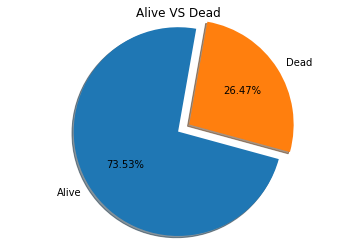

In [7]:
sur_stat=hman["Survival_Status"].value_counts()

# Percentage of people survived 5 years or longer
val=list(sur_stat)
alive=val[0]/rows*100
dead=val[1]/rows*100
print("Percentage of people survived : %3.2f "%(alive))
print("Percentage of people died     : %3.2f "%(dead))
print('\nPie Chart:\n')
plt.axis('equal')
plt.pie([alive,dead],labels=["Alive","Dead"],radius=1.2,autopct="%0.2f%%",shadow=True,explode=[0,0.152],startangle=80)
plt.title('Alive VS Dead')
plt.show()

In [8]:
# Ratio between alive and dead : 5 years afer operation
ratio=alive/dead
print("Ratio of alive and dead : %2.2f"%(ratio))

Ratio of alive and dead : 2.78


In [9]:
hman.groupby('Survival_Status').size()

Survival_Status
1    225
2     81
dtype: int64

  
### 1.3. Observation :

#### Imbalance Dataset : More Points are there for survial patients than patients died
    Survial_Status: It tells us whether the patient survived after 5 years or longer/ died before 5 years

    Out of 306 rows : 225 survied for 5 years after operation
                      81 died before 5 years
                      
    Number of People survived out of 306: 225
    Number of People dead               : 81
    
    Percentage of People survived:73.53 %
        Percentage of People died: 26.47 % 
            
    Ratio of alive and dead      : 2.78

## 2. Preprocessing Data 

#### Modifying the column 'Survival_Status' to Categorical type yes/no

In [10]:
# changing the values of 'Survival_Status' from 1 to 'yes' and 2 to 'no'
hman.loc[:,'Survival_Status'].replace([1,2],['yes','no'],inplace=True)
print(hman.head(10))


   Age  Treatment_Year  Positive_Axillary_Nodes Survival_Status
0   30              64                        1             yes
1   30              62                        3             yes
2   30              65                        0             yes
3   31              59                        2             yes
4   31              65                        4             yes
5   33              58                       10             yes
6   33              60                        0             yes
7   34              59                        0              no
8   34              66                        9              no
9   34              58                       30             yes


In [11]:
# seprate data based on survival_status
pos=hman[hman['Survival_Status']=='yes']
print("\n Postive dataset\n")
print(pos.head(10))
neg=hman[hman['Survival_Status']=='no']
print("\n Negative dataset\n")
print(neg.head(10))


 Postive dataset

    Age  Treatment_Year  Positive_Axillary_Nodes Survival_Status
0    30              64                        1             yes
1    30              62                        3             yes
2    30              65                        0             yes
3    31              59                        2             yes
4    31              65                        4             yes
5    33              58                       10             yes
6    33              60                        0             yes
9    34              58                       30             yes
10   34              60                        1             yes
11   34              61                       10             yes

 Negative dataset

    Age  Treatment_Year  Positive_Axillary_Nodes Survival_Status
7    34              59                        0              no
8    34              66                        9              no
24   38              69                       21   

In [12]:
# description about positive and negative dataset
print("\n Positive: \n",pos.describe())
print("\n Negative: \n",neg.describe())


 Positive: 
               Age           ...             Positive_Axillary_Nodes
count  225.000000           ...                          225.000000
mean    52.017778           ...                            2.791111
std     11.012154           ...                            5.870318
min     30.000000           ...                            0.000000
25%     43.000000           ...                            0.000000
50%     52.000000           ...                            0.000000
75%     60.000000           ...                            3.000000
max     77.000000           ...                           46.000000

[8 rows x 3 columns]

 Negative: 
              Age           ...             Positive_Axillary_Nodes
count  81.000000           ...                           81.000000
mean   53.679012           ...                            7.456790
std    10.167137           ...                            9.185654
min    34.000000           ...                            0.000000
25%

### Observation:
    * Age, Treatment_Year, Number of Positive Axillary Nodes are the important features in this dataset.
    
    * Positive and negative dataset looks much similar
    
#### * Changing the 'Survial_Status' feature from numerical to text makes the dataset more readable

## 3. High level statistics of the dataset

### 3.1. Dataset  Information

    Number of points, number of features, number of classes, data-points per class.

In [13]:
# Number of points in the dataset 
points=hman.shape[0]
print("Number of points :",points)

Number of points : 306


In [14]:
# Number of features
print("Number of features :",hman.shape[1])
print("Name of features: ",hman.columns)

Number of features : 4
Name of features:  Index(['Age', 'Treatment_Year', 'Positive_Axillary_Nodes', 'Survival_Status'], dtype='object')


In [15]:
# Number of data point per class
print(hman.groupby('Survival_Status').size())

Survival_Status
no      81
yes    225
dtype: int64


In [16]:
# Number of classes
print("Number of classes: ",hman['Survival_Status'].nunique())

Number of classes:  2


### 3.2. Mean, Variance and Std-dev

In [17]:
# Mean, Variance and Std-dev
print("Mean age of Patient :  ",np.mean(hman['Age']))
print("Mean Positive Axillary Nodes of Patient : ",np.mean(hman['Positive_Axillary_Nodes']))


Mean age of Patient :   52.45751633986928
Mean Positive Axillary Nodes of Patient :  4.026143790849673


In [18]:
# Mean age of patient survived for 5 or more years
print("Mean age of patient survived for 5 or more years :  ",np.mean(pos['Age']))
print("Mean Positive Axillary Nodes of patient survived for 5 or more years : ",np.mean(pos['Positive_Axillary_Nodes']))


Mean age of patient survived for 5 or more years :   52.01777777777778
Mean Positive Axillary Nodes of patient survived for 5 or more years :  2.7911111111111113


In [19]:
# Mean age of patient survived less than 5  years
print("Mean age of patient survived less than 5 years :  ",np.mean(neg['Age']))
print("Mean Positive Axillary Nodes of patient survived less than 5 years : ",np.mean(neg['Positive_Axillary_Nodes']))

Mean age of patient survived less than 5 years :   53.67901234567901
Mean Positive Axillary Nodes of patient survived less than 5 years :  7.45679012345679


In [20]:
# Std dev of patient

print("Std-dev age :  ",np.std(hman['Age']))
print("Std-dev Positive Axillary Nodes : ",np.std(hman['Positive_Axillary_Nodes']))


Std-dev age :   10.78578520363183
Std-dev Positive Axillary Nodes :  7.177896092811152


In [21]:
# Std-dev of patient survived for 5 or more years
print("Std-dev age of patient survived for 5 or more years :  ",np.std(pos['Age']))
print("Std-dev Positive Axillary Nodes of patient survived for 5 or more years : ",np.std(pos['Positive_Axillary_Nodes']))

# Std-dev age of patient survived less than 5  years
print("Std-dev age of patient survived less than 5 years :  ",np.std(neg['Age']))
print("Std-dev Positive Axillary Nodes of patient survived less than 5 years : ",np.std(neg['Positive_Axillary_Nodes']))

Std-dev age of patient survived for 5 or more years :   10.98765547510051
Std-dev Positive Axillary Nodes of patient survived for 5 or more years :  5.857258449412131
Std-dev age of patient survived less than 5 years :   10.10418219303131
Std-dev Positive Axillary Nodes of patient survived less than 5 years :  9.128776076761632


###  3.3.  Median, Percentile, Quantile, IQR, MAD

In [22]:
#Median, Quantiles, Percentiles, IQR.
print(" Medians of age, positive axillary nodes of patient:")
print("Median Age:",np.median(hman['Age']))
print("Median Positive_Axillary_Nodes:",np.median(hman['Positive_Axillary_Nodes']))

print("\nQuantiles:")
print(np.percentile(hman['Age'],np.arange(0, 100, 25)))
print(np.percentile(hman['Positive_Axillary_Nodes'],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print("Age:",np.percentile(hman["Age"],90))
print("Positive_Axillary_Nodes:",np.percentile(hman["Positive_Axillary_Nodes"],90))

from statsmodels import robust
print ("\n Median Absolute Deviation")
print("Age Median Asolute Deviation: ",robust.mad(hman['Age']))
print("Positive Axillary Nodes Median Absolute Deviation: ",robust.mad(hman['Positive_Axillary_Nodes']))



 Medians of age, positive axillary nodes of patient:
Median Age: 52.0
Median Positive_Axillary_Nodes: 1.0

Quantiles:
[30.   44.   52.   60.75]
[0. 0. 1. 4.]

90th Percentiles:
Age: 67.0
Positive_Axillary_Nodes: 13.0

 Median Absolute Deviation
Age Median Asolute Deviation:  11.860817748044816
Positive Axillary Nodes Median Absolute Deviation:  1.482602218505602


### 3.4. Observation:
    
    * Patient with lower 'Age' has higher chances of survial than patient with higher age.
    
    * Patient with lower 'Positive_Axillary_Nodes' has relatively higher chances of survial than patient with higher age.
    

## 4. Univaraite analysis(PDF, CDF, Boxplot, Voilin plots)

### 4.1. Histogram, PDF, CDF

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


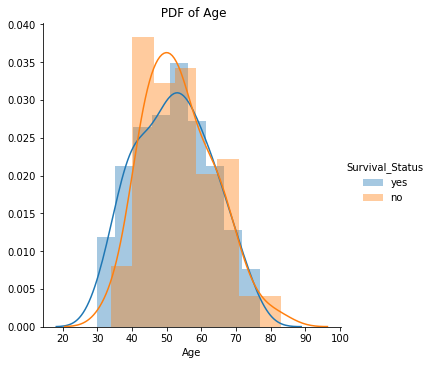

In [23]:
# plot PDF using sns for 'Age'
sns.FacetGrid(hman,hue="Survival_Status",size=5) \
    .map(sns.distplot,"Age") \
    .add_legend();
plt.title(' PDF of Age')
plt.show()

# ​ Plotting all the features one after another

### Observation:

    * It is clear from the above figure that patient having less age has higher chances of survival after treatment.
           
    * Age group of 30-40 years has higher survival rate.
        
    * Patient below 35 years have survived mostly.
        
    * Age group after 90 year mostly died within five years
    

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


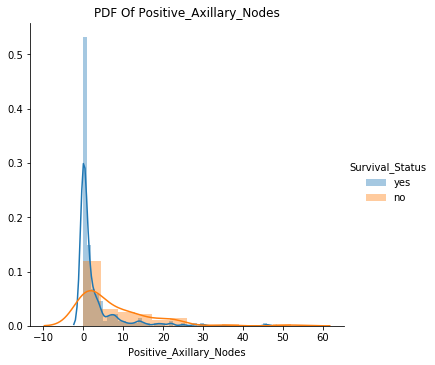

In [24]:
# plot PDF using sns for 'Positive_Axillary_Nodes'
sns.FacetGrid(hman,hue="Survival_Status",size=5) \
    .map(sns.distplot,"Positive_Axillary_Nodes") \
    .add_legend()
plt.title('PDF Of Positive_Axillary_Nodes')
plt.show()

### Observation:

    * If Positive_Axillary_Nodes feature is closer to 0 than chances of survival patient is very high
        
    * Positive Axillary Nodes value above 30 means patient chances of dying is very high
    
    *Positive Axillary Nodes value below 4 means patient chances of dying is very high
        

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


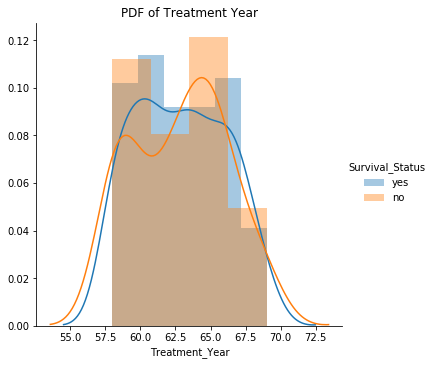

In [25]:
# plot PDF using sns for 'Treatment_Year'
sns.FacetGrid(hman,hue="Survival_Status",size=5) \
    .map(sns.distplot,"Treatment_Year") \
    .add_legend();
plt.title('PDF of Treatment Year')
plt.show()

### Observation:

    * Between the years 1961 to 1964 chances of survival patient is very high
        
    * Before 1964, patient chances of dying is very high
                

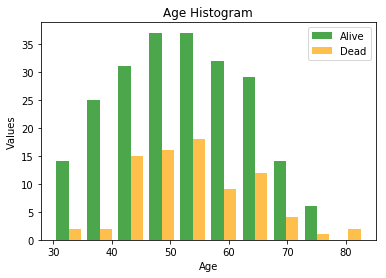

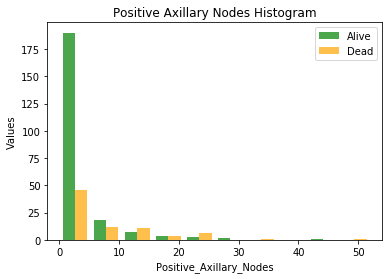

In [26]:
# histogram plots
import warnings
#hiding all the warnings
warnings.filterwarnings('ignore')
# plotting age of positive and negative dataset
plt.hist([pos['Age'],neg['Age']],rwidth=0.8,color=['green','orange'],alpha=0.7,label=['Alive','Dead'])
plt.xlabel('Age')
plt.ylabel('Values')
plt.legend()
plt.title('Age Histogram')
plt.show()

plt.hist([pos['Positive_Axillary_Nodes'],neg['Positive_Axillary_Nodes']], \
         rwidth=0.8,color=['green','orange'],alpha=0.7,label=['Alive','Dead'])
plt.xlabel('Positive_Axillary_Nodes')
plt.ylabel('Values')
plt.legend()
plt.title('Positive Axillary Nodes Histogram')
plt.show()

### Conclusion:

* Although, it is an imbalance dataset, by looking at the Age Histogram we can say that patient below 40 years have higher chances of survival than patient whos age is above 40.

* If patient age is above 80 chances of survival is almost 0.

* Positive Axillary Nodes value at 0 has more chances of survial than any other value.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


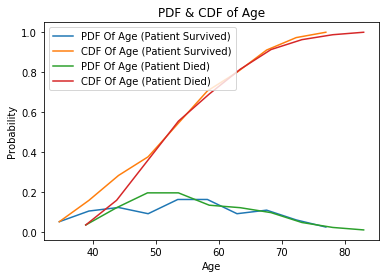

In [27]:
# Cumulative Distribution Function (CDF) and PDF Of Age (Patient Survived & Dead)


counts, bin_edges = np.histogram(pos['Age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF Of Age (Patient Survived)');
plt.plot(bin_edges[1:], cdf,label='CDF Of Age (Patient Survived)')
plt.legend()

counts, bin_edges = np.histogram(neg['Age'], bins=10, density=True)
pdf = counts/(sum(counts))
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF Of Age (Patient Died)');
plt.plot(bin_edges[1:],cdf,label='CDF Of Age (Patient Died)')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('PDF & CDF of Age')
plt.show();

### Observation:

Both pdf and cdf almost overlaping each other.
Probability of survival of patient below age 36 is high
Probability of death of patient above 78 is high


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


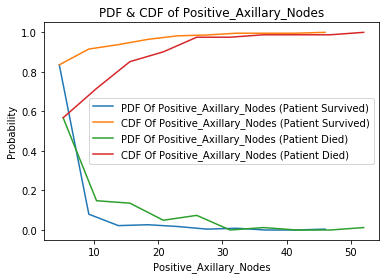

In [28]:
# Cumulative Distribution Function (CDF) and PDF Of Positive_Axillary_Nodes (Patient Survived & Dead)


counts, bin_edges = np.histogram(pos['Positive_Axillary_Nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF Of Positive_Axillary_Nodes (Patient Survived)');
plt.plot(bin_edges[1:], cdf,label='CDF Of Positive_Axillary_Nodes (Patient Survived)')
plt.legend()

counts, bin_edges = np.histogram(neg['Positive_Axillary_Nodes'], bins=10, density=True)
pdf = counts/(sum(counts))
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF Of Positive_Axillary_Nodes (Patient Died)');
plt.plot(bin_edges[1:],cdf,label='CDF Of Positive_Axillary_Nodes (Patient Died)')
plt.legend()
plt.xlabel('Positive_Axillary_Nodes')
plt.ylabel('Probability')
plt.title('PDF & CDF of Positive_Axillary_Nodes')
plt.show();

### Observation:

Probability of survival of patient when Positive_Axillary_Nodes is 0 is more than 0.8 (80%).

Probability of death of patient is high when Positive_Axillary_Nodes value is more than 45.

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


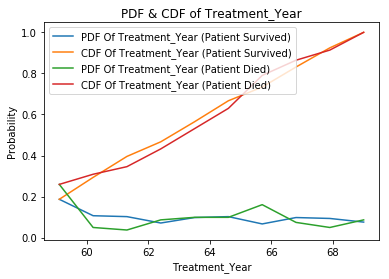

In [29]:
# Cumulative Distribution Function (CDF) and PDF Of Treatment Year (Patient Survived & Dead)


counts, bin_edges = np.histogram(pos['Treatment_Year'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF Of Treatment_Year (Patient Survived)');
plt.plot(bin_edges[1:], cdf,label='CDF Of Treatment_Year (Patient Survived)')
plt.legend()

counts, bin_edges = np.histogram(neg['Treatment_Year'], bins=10, density=True)
pdf = counts/(sum(counts))
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='PDF Of Treatment_Year (Patient Died)');
plt.plot(bin_edges[1:],cdf,label='CDF Of Treatment_Year (Patient Died)')
plt.legend()
plt.xlabel('Treatment_Year')
plt.ylabel('Probability')
plt.title('PDF & CDF of Treatment_Year')
plt.show();

### Conclusion:
Both pdf and cdf plots almost overlapping each other.

More patient survived in the year between 1960 to 1962.

### 4.2. Box plot and Whiskers

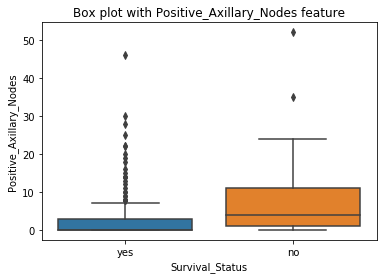

In [30]:
# box plot with Positive_Axillary_Nodes feature
sns.boxplot(x='Survival_Status', y='Positive_Axillary_Nodes',data=hman)
plt.title('Box plot with Positive_Axillary_Nodes feature')
plt.show()



### Observation
    
    *  Positive_Axillary_Nodes value between 0 to 4 then the chances of survival is high 
    

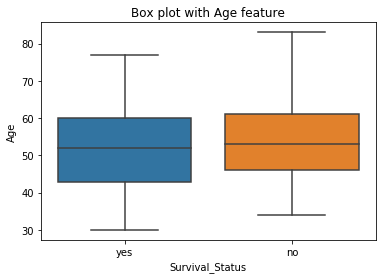

In [31]:
# box plot with Age feature
sns.boxplot(x='Survival_Status', y='Age',data=hman)
plt.title('Box plot with Age feature')
plt.show()



### Observation
    
    *  Age below 34 then the chances of survival is high
    *  Age above 77 then the chances of death is high
    

### 4.3. Violin plots
     
     A violin plot combines the benefits of the Box plot and also show the probability density of the data at different values
     and simplifies them

     Denser regions of the data are fatter, and sparser ones thinner in a violin plot
 


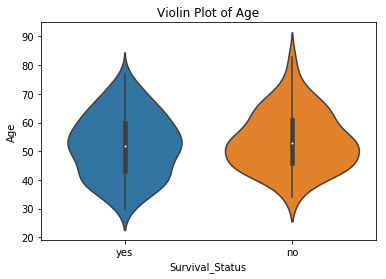

In [32]:
sns.violinplot(x="Survival_Status", y="Age", data=hman, size=8)
plt.title('Violin Plot of Age')
plt.show()

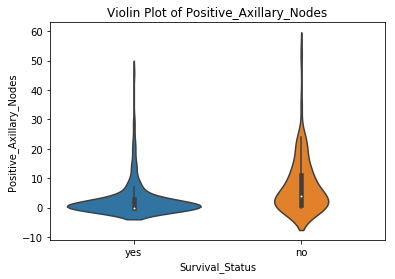

In [33]:
sns.violinplot(x="Survival_Status", y="Positive_Axillary_Nodes", data=hman, size=8)
plt.title('Violin Plot of Positive_Axillary_Nodes')
plt.show()

### Observation:
    
    Positive_Axillary_Nodes value close to 0 , higher the chances of survival

## 5. Bi-variate analysis (scatter plots, pair-plots)

### 5.1. Scatter plots

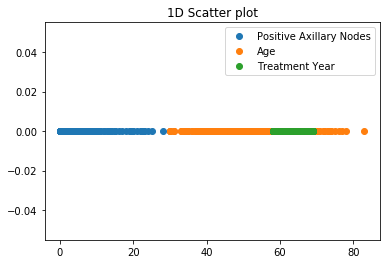

In [34]:
# 1D Scatter plot

plt.plot(hman["Positive_Axillary_Nodes"], np.zeros_like(hman['Positive_Axillary_Nodes']), 'o',label="Positive Axillary Nodes")
plt.plot(hman["Age"], np.zeros_like(hman['Age']), 'o',label="Age")
plt.plot(hman["Treatment_Year"], np.zeros_like(hman['Treatment_Year']), 'o',label="Treatment Year")


plt.title("1D Scatter plot")
plt.legend()
plt.show()

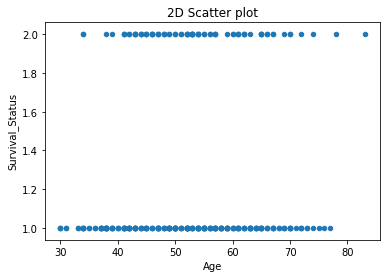

In [35]:
# 2D Scatter plot
hman1=pd.read_csv("../input/haberman.csv",header=None, names=['Age','Treatment_Year','Positive_Axillary_Nodes','Survival_Status'])

hman1.plot(kind='Scatter',x='Age',y='Survival_Status')
plt.title('2D Scatter plot')
plt.show()

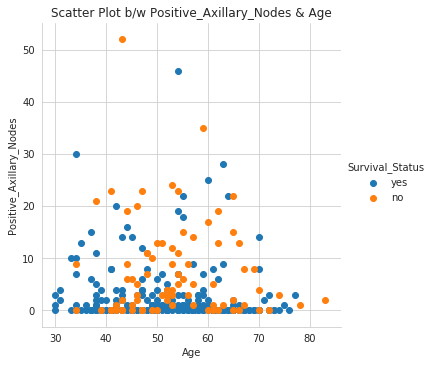

In [36]:
# using seaborn
sns.set_style("whitegrid");
sns.FacetGrid(hman,hue="Survival_Status", size=5) \
   .map(plt.scatter, "Age", "Positive_Axillary_Nodes") \
   .add_legend();
plt.title('Scatter Plot b/w Positive_Axillary_Nodes & Age')
plt.show();

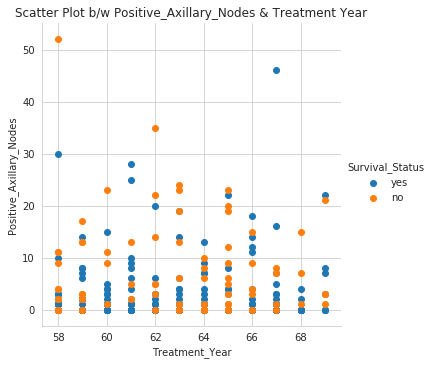

In [37]:
# plotting between treatment year and survival status
sns.set_style("whitegrid");
sns.FacetGrid(hman,hue="Survival_Status", size=5) \
   .map(plt.scatter, "Treatment_Year", "Positive_Axillary_Nodes") \
   .add_legend();
plt.title('Scatter Plot b/w Positive_Axillary_Nodes & Treatment Year')
plt.show();

### Observation:
     * Scatter plot does not make much sense

### 5.2. Pair Plot

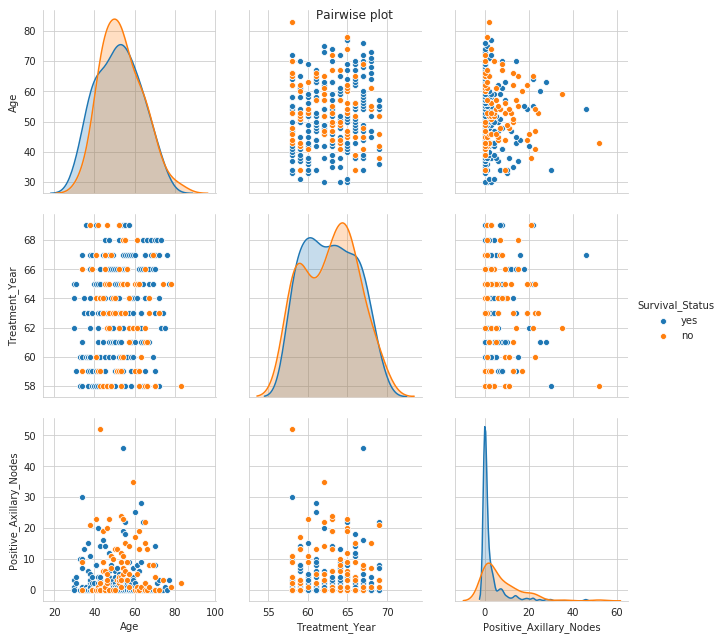

In [38]:
# Plotting Pairwise plot

#sns.set_style("ticks");
pairplot=sns.pairplot(hman, hue="Survival_Status", size=3)
pairplot.fig.suptitle("Pairwise plot")
plt.show()

### Observations

    * Age below 34 years has higher chances of survial
    
    * Positive axillary nodes values close to 0 has higher chances of survial 

## 6. Conclusion

* From all the plots and analysis of dataset, we can conclude that:
    
* Age and Positive axillary nodes are the two important features in the dataset to determine wheather the patient will survive for 5 or more years
    
* Age below 34 years has higher chances of survival after treatment.
    
* If Age above 77 years then the chances of death is high
    
* More numbers of successful treatment is done in the year between 1960 to 1962.
    
* Probability of survival of patient when Positive_Axillary_Nodes is 0 is more than 0.8 (80%).
    
* Positive Axillary Nodes value above 30 means patient chances of dying is very high
    
    

## 7. References:

1. AppliedAICourses.com Exploratory Data Analysis ==> [basics, syntax, plotting techniques]
2. https://www.kaggle.com/gilsousa/habermans-survival-data-set ==> [dataset, information about the dataset]
3. https://www.kaggle.com/gokulkarthik/haberman-s-survival-exploratory-data-analysis ==> [column headings ]
4. https://www.python-course.eu/python3_formatted_output.php ==>[print formatting syntax]
5. https://github.com/pandas-dev/pandas/issues/11984 ==>[replacing 1 with 'yes' and 0 with 'no']
6. https://stackoverflow.com/questions/38309729/count-unique-values-with-pandas-per-groups/38309823 ==>[nunique]
7. https://www.youtube.com/playlist?list=PLeo1K3hjS3uu4Lr8_kro2AqaO6CFYgKOl (CodeBasics) ==>[Matlab Plotting methods]